In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 

%matplotlib inline

In [2]:
data = pd.read_csv("data/data1.csv", names = ['x','y'])

In [3]:
data.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# Linear regression with one feature

In [4]:
X = data.loc[:,'x']
y = data.loc[:,'y']

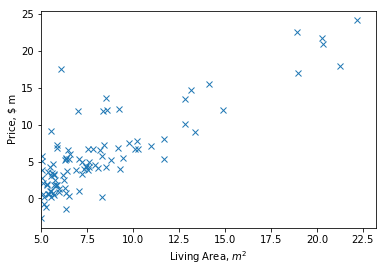

In [5]:
plt.plot(X, y, 'x')
plt.xlabel('Living Area, $m^2$')
plt.ylabel('Price, $ m')
plt.xlim(5, X.max() + 1)
plt.show()

In [6]:
def Hypothesis(X, theta_0, theta_1, i):
    return theta_0 + theta_1 * X[i]

def Cost(X,y, theta_0, theta_1):
    m = X.size
    s = sum([(Hypothesis(X, theta_0, theta_1, i) - y[i])**2 
             for i in range(m)])
    return s/(2*m)

In [7]:
th_0_r = np.arange(-10,10,0.1)
th_1_r = np.arange(-4,4,0.1)
th_0,th_1 = np.meshgrid(th_0_r, th_1_r)
J = np.array([Cost(X,y,i,j) for i,j in zip(np.ravel(th_0), np.ravel(th_1))])
J = J.reshape(th_0.shape)

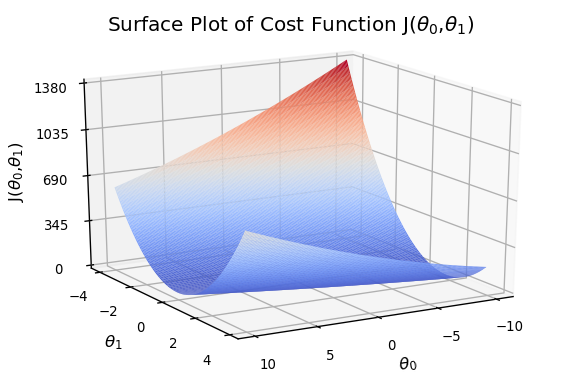

In [8]:
fig = plt.figure(figsize = (6,4), dpi = 120)
ax = fig.gca(projection='3d')

surf = ax.plot_surface(th_0, th_1, J, cmap = cm.coolwarm,
                       rstride=1, cstride=1, alpha=1)

ax.set_title(r'Surface Plot of Cost Function J($\theta_0$,$\theta_1$)')
ax.tick_params(labelsize = 8)
ax.set_xlabel(r'$\theta_0$')
ax.set_xticks(np.linspace(-10,10,5))
ax.yaxis.set_rotate_label(False)
ax.set_ylabel(r'$\theta_1$', rotation = 0)
ax.set_yticks(np.linspace(-4,4,5))
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'J($\theta_0$,$\theta_1$)', fontsize = 10, rotation = 90)
ax.set_zticks(np.linspace(0, np.max(J) + 1, 5))

ax.view_init(elev = 20, azim = 60)
plt.show()

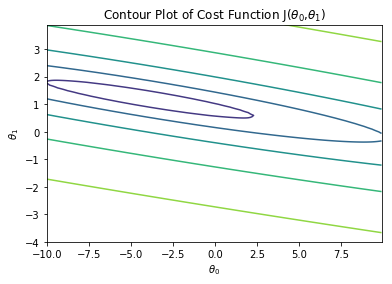

In [9]:
plt.contour(th_0, th_1, np.log2(J))
plt.title(r'Contour Plot of Cost Function J($\theta_0$,$\theta_1$)')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.show()

In [15]:
def GradientDescent(X, y, theta_0, theta_1, alpha, max_iter):  
    
    m = X.size
    
    def difCost(dif_param):
        if dif_param == 0:
            s = sum([Hypothesis(X, theta_0, theta_1, i) - y[i] 
                     for i in range(m)])
        else:
            s = sum([(Hypothesis(X, theta_0, theta_1, i) - y[i]) * X[i]
                     for i in range(m)])
        return s / m
        
    cost_history = np.array([Cost(X, y, theta_0, theta_1)] * (max_iter + 1))
    theta_history = np.array([[0., 0.]] * (max_iter + 1))
    
    for i in range(max_iter):
        tmp_0 = theta_0 - alpha * difCost(0)
        tmp_1 = theta_1 - alpha * difCost(1)
        theta_0 = tmp_0
        theta_1 = tmp_1
        
        cost_history[i+1] = Cost(X, y, theta_0, theta_1)
        theta_history[i+1] = [theta_0, theta_1]
    
    return cost_history, theta_history

In [16]:
theta_0 = 0.
theta_1 = 0.
learning_rate = 0.01
max_iterations = 1500

result = GradientDescent(X, y, theta_0, theta_1, 
                         learning_rate, max_iterations)

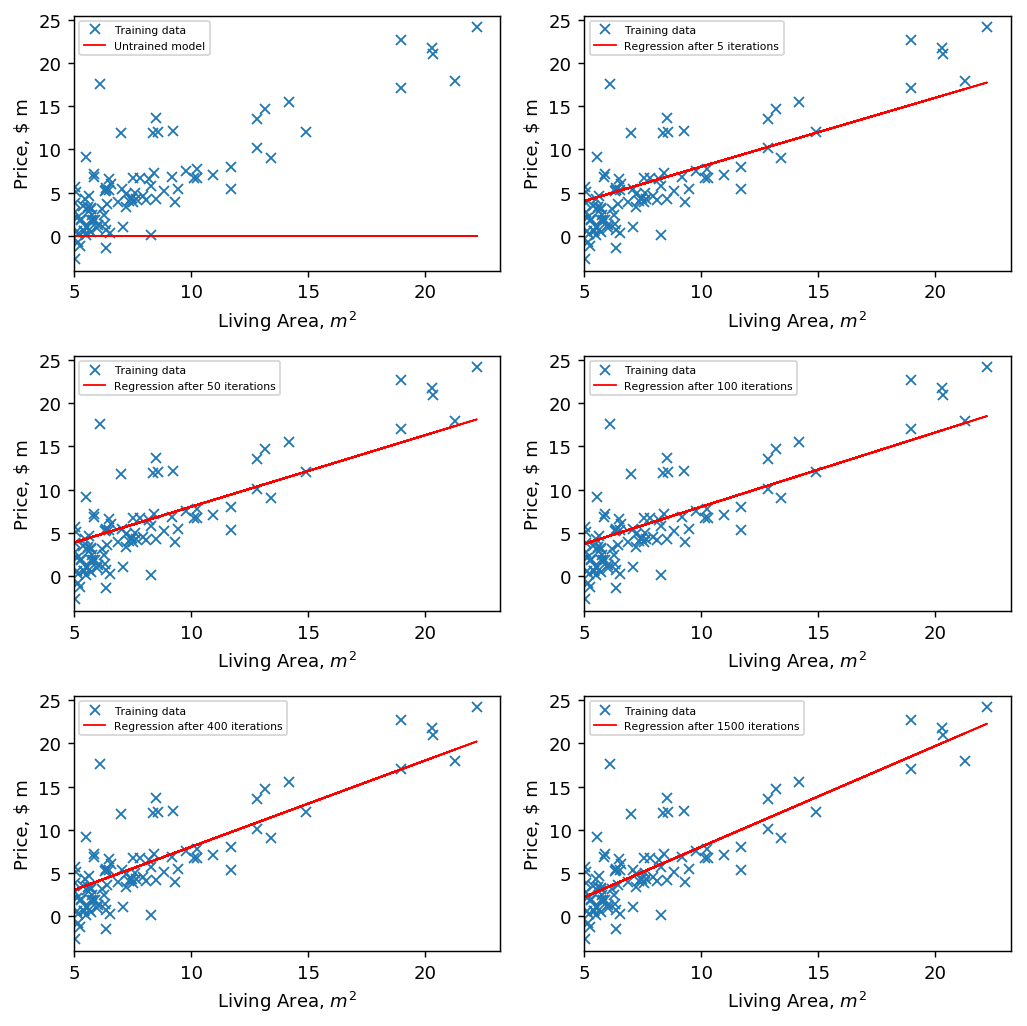

In [17]:
theta_history = result[1]
points = [0, 5, 50, 100, 400, 1500]

def Y(X, theta_history, point):
    y = [theta_history[point][0] + theta_history[point][1] * X[i]
         for i in range(X.size)]
    return y

plt.figure(figsize=(8,8), dpi = 130)
for i in range(len(points)):
    if i == 0:
        label = 'Untrained model'
    else :
        label = 'Regression after {} iterations'.format(points[i])
    plt.subplot(3,2,(i + 1))
    plt.plot(X, y, 'x', label = 'Training data')
    plt.plot(X, Y(X, theta_history, points[i]),
             'r', label = label,
            linewidth = 1.0)
    plt.legend(loc = 'best', fontsize = 6)
    plt.xlabel('Living Area, $m^2$')
    plt.ylabel('Price, $ m')
    plt.xlim(5, X.max() + 1)
plt.tight_layout()
plt.show()

In [18]:
theta_0 = 0.
theta_1 = 0.
rates = [0.03, 0.01, 0.005, 0.001]
max_iterations = 200
results = [GradientDescent(X, y, theta_0, theta_1, i, max_iterations)[0]
          for i in rates]

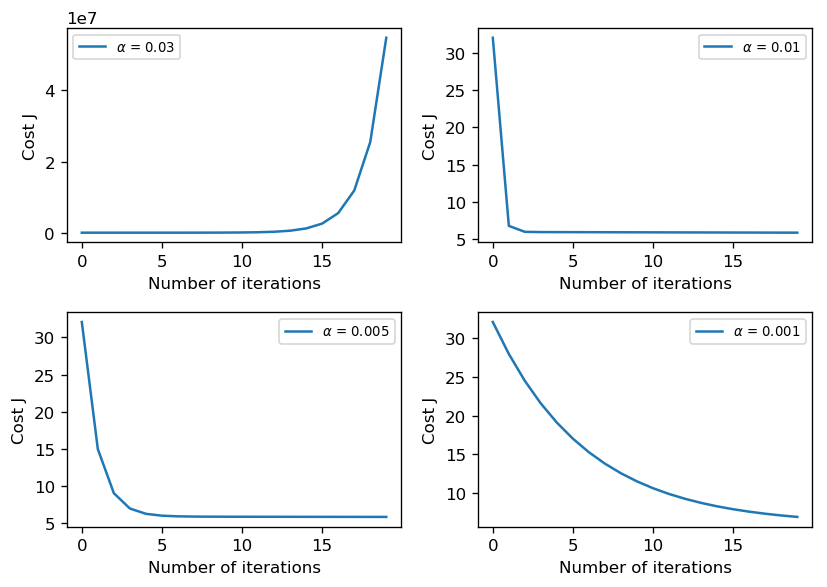

In [19]:
x_ax = range(0, 20)

plt.figure(figsize=(7,5), dpi = 120)
for i in range(len(rates)):
    plt.subplot(2,2,(i+1))
    plt.plot(x_ax, results[i][:len(x_ax)], label = r'$\alpha$ = {}'.format(rates[i]))
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost J')
    plt.legend(loc = 'best', fontsize = 8)

plt.tight_layout()
plt.show()

# Linear regression with multiple features

In [20]:
data2 = pd.read_csv('data/data2.csv', names = ['x_1','x_2','y'])
data2.head()

,x_1,x_2,y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [21]:
X = data2.iloc[:, :2]
y = data2.iloc[:, 2]
y = np.array(y, dtype = 'float32')

In [22]:
mu = np.array([X.mean()])
sigma = np.array([X.std()])

In [23]:
def Normalize(x, mu, sigma):
    x = np.array(x, dtype = 'float32')
    x = (x - mu) / sigma

    if x.ndim < 2:
        x = np.insert(x, 0, 1, axis = 0)
    else:
        x = np.insert(x, 0, np.ones(x.shape[0]),
                         axis = 1)
    return x

In [24]:
def CostMulti(X, theta, y):
    m = len(X)
    delta = np.dot(theta, np.transpose(X)) - y
    return 1/(2*m) * (np.dot(delta, np.transpose(delta))) 

In [25]:
def GradientDescentMulti(X, theta, y, alpha, max_iterations):
    
    m = len(X)
    
    def difCostMulti():
        delta = np.dot(theta, np.transpose(X)) - y
        return 1/m * np.dot(delta, X)
    
    for i in range(max_iterations):
        theta_tmp = theta - alpha * difCostMulti()
        theta = theta_tmp
        
        if  i % 10 == 0: 
            print("step", i, ":\t", '{:.2f}'.format(
                CostMulti(X, theta, y))) 
    
    return theta

In [26]:
alpha = 1
max_iterations = 400
theta = np.array([0] * 3)

X = Normalize(X, mu, sigma)
theta = GradientDescentMulti(X, theta, y, alpha, max_iterations)

print('Results after {} iterations:\n\n{:.2f}\n{:.2f}\n{:.2f}'.format(
    max_iterations, theta[0], theta[1], theta[2]))

step 0 :	 3668504405.08
step 10 :	 2043289296.18
step 20 :	 2043280050.69
step 30 :	 2043280050.60
step 40 :	 2043280050.60
step 50 :	 2043280050.60
step 60 :	 2043280050.60
step 70 :	 2043280050.60
step 80 :	 2043280050.60
step 90 :	 2043280050.60
step 100 :	 2043280050.60
step 110 :	 2043280050.60
step 120 :	 2043280050.60
step 130 :	 2043280050.60
step 140 :	 2043280050.60
step 150 :	 2043280050.60
step 160 :	 2043280050.60
step 170 :	 2043280050.60
step 180 :	 2043280050.60
step 190 :	 2043280050.60
step 200 :	 2043280050.60
step 210 :	 2043280050.60
step 220 :	 2043280050.60
step 230 :	 2043280050.60
step 240 :	 2043280050.60
step 250 :	 2043280050.60
step 260 :	 2043280050.60
step 270 :	 2043280050.60
step 280 :	 2043280050.60
step 290 :	 2043280050.60
step 300 :	 2043280050.60
step 310 :	 2043280050.60
step 320 :	 2043280050.60
step 330 :	 2043280050.60
step 340 :	 2043280050.60
step 350 :	 2043280050.60
step 360 :	 2043280050.60
step 370 :	 2043280050.60
step 380 :	 2043280050.

In [27]:
def PredictionGD(pred, mu, sigma, theta):
    pred = Normalize(example, mu, sigma)
    return np.dot(pred, theta)

In [28]:
example = np.array([1640, 3])
pred = PredictionGD(example, mu, sigma, theta)
print(pred)

[291689.35759472]


# Normal Equation

In [29]:
data2 = pd.read_csv('data/data2.csv', names = ['x_1','x_2','y'])

X = np.array(data2.iloc[:, :2])
y = data2.iloc[:, 2]
y = np.array(y, dtype = 'float32')

In [30]:
def NormalEq(X, y):
    X = np.insert(X, 0, np.ones(len(X)), axis = 1)
    mul = np.matmul(X.T, X)
    inv = np.linalg.inv(mul)
    return np.dot(np.matmul(inv, X.T), y)

In [31]:
def PredictionNE(test, theta):
    test = np.array(test)
    if test.ndim < 2:
        test = np.insert(test, 0, 1, axis = 0)
    else:
        test = np.insert(test, 0, np.ones(test.shape[0]),
                         axis = 1)
    return np.dot(test, theta)

In [32]:
theta = NormalEq(X, y)
test = [1640, 3]
pred = PredictionNE(test, theta)
print(pred)

291689.357594718
